In [ ]:
from google.colab import files
files.upload()

Saving Advertising.csv to Advertising.csv


{'Advertising.csv': b'TV,radio,newspaper,sales\r\n230.1,37.8,69.2,22.1\r\n44.5,39.3,45.1,10.4\r\n17.2,45.9,69.3,9.3\r\n151.5,41.3,58.5,18.5\r\n180.8,10.8,58.4,12.9\r\n8.7,48.9,75.0,7.2\r\n57.5,32.8,23.5,11.8\r\n120.2,19.6,11.6,13.2\r\n8.6,2.1,1.0,4.8\r\n199.8,2.6,21.2,10.6\r\n66.1,5.8,24.2,8.6\r\n214.7,24.0,4.0,17.4\r\n23.8,35.1,65.9,9.2\r\n97.5,7.6,7.2,9.7\r\n204.1,32.9,46.0,19.0\r\n195.4,47.7,52.9,22.4\r\n67.8,36.6,114.0,12.5\r\n281.4,39.6,55.8,24.4\r\n69.2,20.5,18.3,11.3\r\n147.3,23.9,19.1,14.6\r\n218.4,27.7,53.4,18.0\r\n237.4,5.1,23.5,12.5\r\n13.2,15.9,49.6,5.6\r\n228.3,16.9,26.2,15.5\r\n62.3,12.6,18.3,9.7\r\n262.9,3.5,19.5,12.0\r\n142.9,29.3,12.6,15.0\r\n240.1,16.7,22.9,15.9\r\n248.8,27.1,22.9,18.9\r\n70.6,16.0,40.8,10.5\r\n292.9,28.3,43.2,21.4\r\n112.9,17.4,38.6,11.9\r\n97.2,1.5,30.0,9.6\r\n265.6,20.0,0.3,17.4\r\n95.7,1.4,7.4,9.5\r\n290.7,4.1,8.5,12.8\r\n266.9,43.8,5.0,25.4\r\n74.7,49.4,45.7,14.7\r\n43.1,26.7,35.1,10.1\r\n228.0,37.7,32.0,21.5\r\n202.5,22.3,31.6,16.6\r\n177.0,33.4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Advertising.csv")
## CREATE X and y
X = df.drop("sales",axis=1)
y = df["sales"]

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA: WHy? 페널티, ML 비선형으로 변환 하는 것이 많아서 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100) # ML 모형은 하이퍼파라미터 튜닝 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

model = Ridge(alpha=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred))






7.34177578903413
2.319021579428752


In [ ]:
# 일반적으로 머신러닝 모형의 결과는 
# 최적 파라미터 값에서 구한다.
# GRID Search 라는 방법론을 구하는게 가장 쉬운 방법이다. 

In [ ]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = Ridge(alpha=100)


In [ ]:
from sklearn.model_selection import cross_val_score
model = Ridge(alpha=100)
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
print(scores)
model = Ridge(alpha=1)
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
print(scores)





[-3.13674786 -2.42708179 -1.58448895 -5.40882841 -2.80104087]
[-3.13654149 -2.42568133 -1.585217   -5.42597989 -2.79124367]


## Train-Test Split 좋음
* 문제가 있음: 임의로 Test 셋이 골라졌음 어떻하냐?
* Test Set을 Shuffle하는 함수를 만들어서 한다.

In [ ]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])

np.random.seed(42)
indices = np.random.permutation(len(iris_data))
n_training_samples = 50
learnset_data = iris_data[indices[:-n_training_samples]]
learnset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])




[5.1 3.5 1.4 0.2] [5.7 2.6 3.5 1. ] [6.3 3.3 6.  2.5]
0 1 2
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]


In [ ]:
indices = np.random.permutation(len(iris_data))
indices

array([ 84,  20,  45,  47, 149, 114, 144, 117,   9,  90, 146,  14,  33,
       141,  13,  77,  46,   5,   3,   7, 123,  49, 148, 101,  75,  48,
        21, 108,  60,  62,  42,  56, 125, 116,  59,   4,  99, 112,  89,
        63, 145,  66,  34,  41, 139,  30,  22,  24, 137, 118,  88,  79,
        17,  98,  39,  32,  40, 100,   6,  81,  94,  64,  73,  25, 122,
       147,  72,  19, 113,  93,  15,  10,  82,  68, 109,  37,  16, 111,
       132,  54,  67, 134, 119, 106, 110,  52, 130,  18,   0,  86,  53,
        92,  97, 136,  80,  55, 121,   1,  38,  11, 103,  57, 124,  51,
        87,  95,  31,  58,  78,  23, 135, 105,  50,  96,  36, 126,   8,
       131,  71,  69, 102,   2, 104,  76, 115, 129, 140,  26, 120, 128,
        91, 127,  74,  29,  83,  43, 107, 138, 143, 133,  61,  44,  65,
        27,  85,  70,  12,  35,  28, 142])

In [ ]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # KNN 구축 Default 값
knn.fit(learnset_data, learnset_labels) 
print("Predictions form the classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)

 



Predictions form the classifier:
[0 0 0 2 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 1 0 1 2]
Target values:
[0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 2 0 1 2]


In [ ]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # hyper parameter tuning 
knn.fit(learnset_data, learnset_labels) 
print("Predictions form the classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)

# 머신러닝 모형끼리 비교 
from sklearn.svm import SVC # Supprt Vector Classifier
model = SVC(kernel='linear', C=1000)
model.fit(learnset_data, learnset_labels) 
print("Predictions form the classifier:")
print(model.predict(testset_data))
print("Target values:")
print(testset_labels)
# SVC 좀 낫네 



Predictions form the classifier:
[0 0 0 2 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 1 0 1 2]
Target values:
[0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 2 0 1 2]
Predictions form the classifier:
[0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 1 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 2 0 1 2]
Target values:
[0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 2 0 1 2]


In [ ]:
files.upload()

Saving mouse_viral_study.csv to mouse_viral_study.csv


{'mouse_viral_study.csv': b'Med_1_mL,Med_2_mL,Virus Present\r\n6.508231092778478,8.582530517168834,0\r\n4.126116159459635,3.0734585320324737,1\r\n6.427870479400083,6.369758103535007,0\r\n3.6729533598321504,4.905215249940063,1\r\n1.5803206800377936,2.440562302195768,1\r\n2.15822377398559,2.7454512398737183,1\r\n8.172223496843538,7.328994873431797,0\r\n8.719652335230442,6.228618301234675,0\r\n6.779079372963939,6.630667118733948,0\r\n3.0436331904746012,4.642649940107834,1\r\n1.7138759191312358,3.5188560013538677,1\r\n2.020123874999962,3.403189454825145,1\r\n4.055748603658648,3.1242432294061078,1\r\n3.6301579288759176,3.7489663385034526,1\r\n3.0536347897071137,4.872665822711166,1\r\n8.392228630872772,8.110502310745462,0\r\n6.176983774867312,7.949241165922479,0\r\n7.2862327617956435,7.243546847397496,0\r\n7.481510167476451,6.670184345077146,0\r\n3.2548003278856052,4.460048182663909,1\r\n6.90258268522116,7.163204418823208,0\r\n2.983372599819152,1.6151576047528442,1\r\n9.115192013121943,8.292

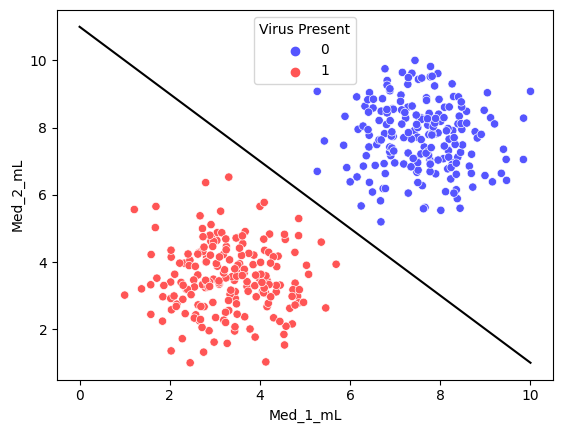

In [ ]:
import seaborn as sns
df = pd.read_csv("mouse_viral_study.csv")
df.columns
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present', data=df,palette='seismic')

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [ ]:
from sklearn.svm import SVC # Supprt Vector Classifier

y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

model = SVC(kernel='linear', C=1000)
model.fit(X, y) # 모형 설정 # fitting #  prediction  
       




SVC(C=1000, kernel='linear')

In [ ]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

print(data.head())


   Sepal length  Sepal width  Petal length  Petal width  labels
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [ ]:
feature = data[ ['Sepal length','Sepal width']]
feature.head()


,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
from sklearn.cluster import KMeans

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  predict
0             5.1          3.5        1
1             4.9          3.0        1
2             4.7          3.2        1
3             4.6          3.1        1
4             5.0          3.6        1
..            ...          ...      ...
145           6.7          3.0        2
146           6.3          2.5        0
147           6.5          3.0        2
148           6.2          3.4        2
149           5.9          3.0        0

[150 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


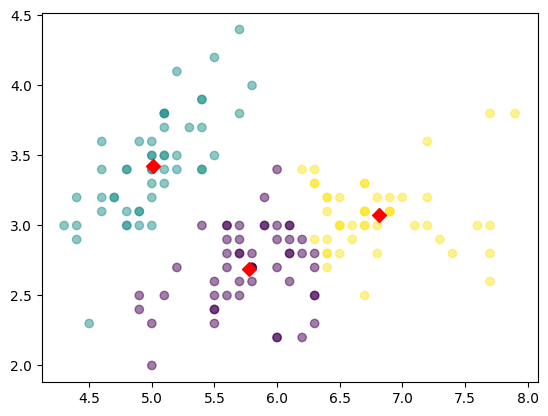

In [ ]:

centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()



In [ ]:
# 실제는 불가능 

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)


predict   0   1   2
labels             
0         0  50   0
1        38   0  12
2        15   0  35


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

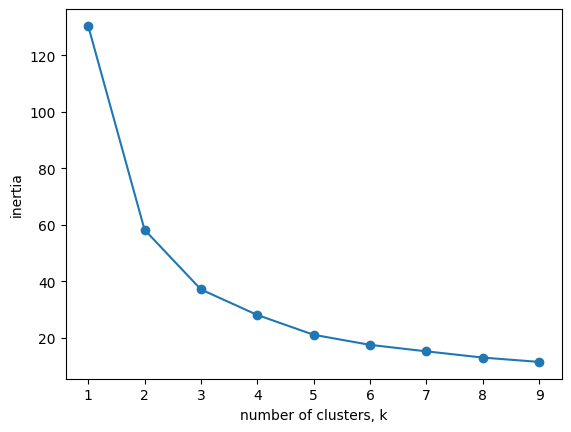

In [ ]:
inertias = []

for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(range(1,10), inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1,10))
plt.show()
